In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
import tabix
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
import matplotlib
import statistics


In [72]:
cnv_data = pd.read_table('/Users/luciabazan/Downloads/hm3_cnv_submission.txt')
population_data = pd.read_table('/Users/luciabazan/Downloads/relationships_w_pops_121708.txt', index_col=1)
counts = cnv_data.iloc[:,4:1188]
features 

In [79]:
cnvs

,cnp_id,chr,start,end,NA06984,NA06985,NA06986,NA06989,NA06991,NA06993,...,NA21733,NA21738,NA21739,NA21740,NA21741,NA21768,NA21776,NA21784,NA21825,NA21826
0,HM3_CNP_1,1,8105049,8112441,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,HM3_CNP_2,1,10292133,10300570,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,HM3_CNP_3,1,10466423,10467633,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,HM3_CNP_4,1,12764515,12894420,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0
4,HM3_CNP_5,1,13647613,13649415,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,HM3_CNP_852,22,35273727,35278692,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
852,HM3_CNP_853,22,36078340,36079892,2.0,1.0,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
853,HM3_CNP_854,22,37625201,37626850,2.0,1.0,2.0,0.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
854,HM3_CNP_855,22,39203522,39210638,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


<AxesSubplot:ylabel='Count'>

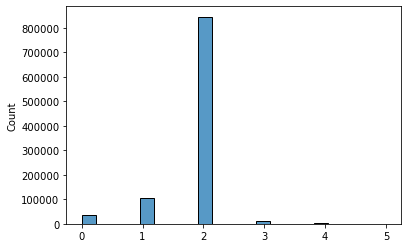

In [128]:
hist = (np.array(counts).flatten())
seaborn.histplot(hist)



<AxesSubplot:xlabel='population', ylabel='Count'>

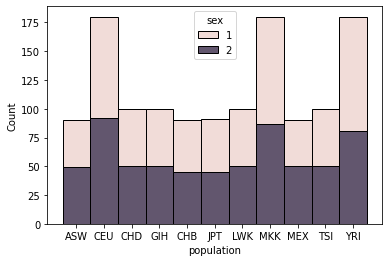

In [39]:
seaborn.histplot(data=population_data, x="population", hue="sex",  multiple="stack")

In [174]:
#track features for pca & tsne
count = counts.T
features = population_data.merge(count, left_index=True, right_index=True)
features = features.loc[:,['sex','population', 'pheno']]
features

#imputation and normalization 
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x = imp.fit_transform(counts.T)
x = StandardScaler().fit_transform(x)


#PCA
pca = PCA(n_components=3)
pca_results = pca.fit_transform(x)

df_pca= pd.DataFrame(pca_results,
                          columns=['component_1','component_2', 'component_3'],
                          index=features.index)



df_pca = features.merge(df_pca, left_index=True, right_index=True)
df_pca

,sex,population,pheno,component_1,component_2,component_3
NA19625,2,ASW,0,-4.384265,-6.376051,-0.615602
NA19702,1,ASW,0,-4.014430,-4.536286,-0.491665
NA19700,1,ASW,0,-5.799174,-6.348436,-2.197071
NA19701,2,ASW,0,-4.852651,-5.469459,-0.405638
NA19705,1,ASW,0,-4.970381,-5.699688,-1.490585
...,...,...,...,...,...,...
NA19236,1,YRI,0,6.186387,-0.558812,4.795782
NA19235,2,YRI,0,5.750221,0.319520,0.545738
NA19249,1,YRI,0,3.368027,-1.371036,3.861335
NA19248,1,YRI,0,4.009797,1.928501,6.164299


            sex  pheno  component_1  component_2  component_3
population                                                   
ASW           2      0    -4.384265    -6.376051    -0.615602
ASW           1      0    -4.014430    -4.536286    -0.491665
ASW           1      0    -5.799174    -6.348436    -2.197071
ASW           2      0    -4.852651    -5.469459    -0.405638
ASW           1      0    -4.970381    -5.699688    -1.490585
...         ...    ...          ...          ...          ...
YRI           1      0     6.186387    -0.558812     4.795782
YRI           2      0     5.750221     0.319520     0.545738
YRI           1      0     3.368027    -1.371036     3.861335
YRI           1      0     4.009797     1.928501     6.164299
YRI           2      0     6.734017    -1.662737     2.450137

[1184 rows x 5 columns]
Count of groups by factor: 11


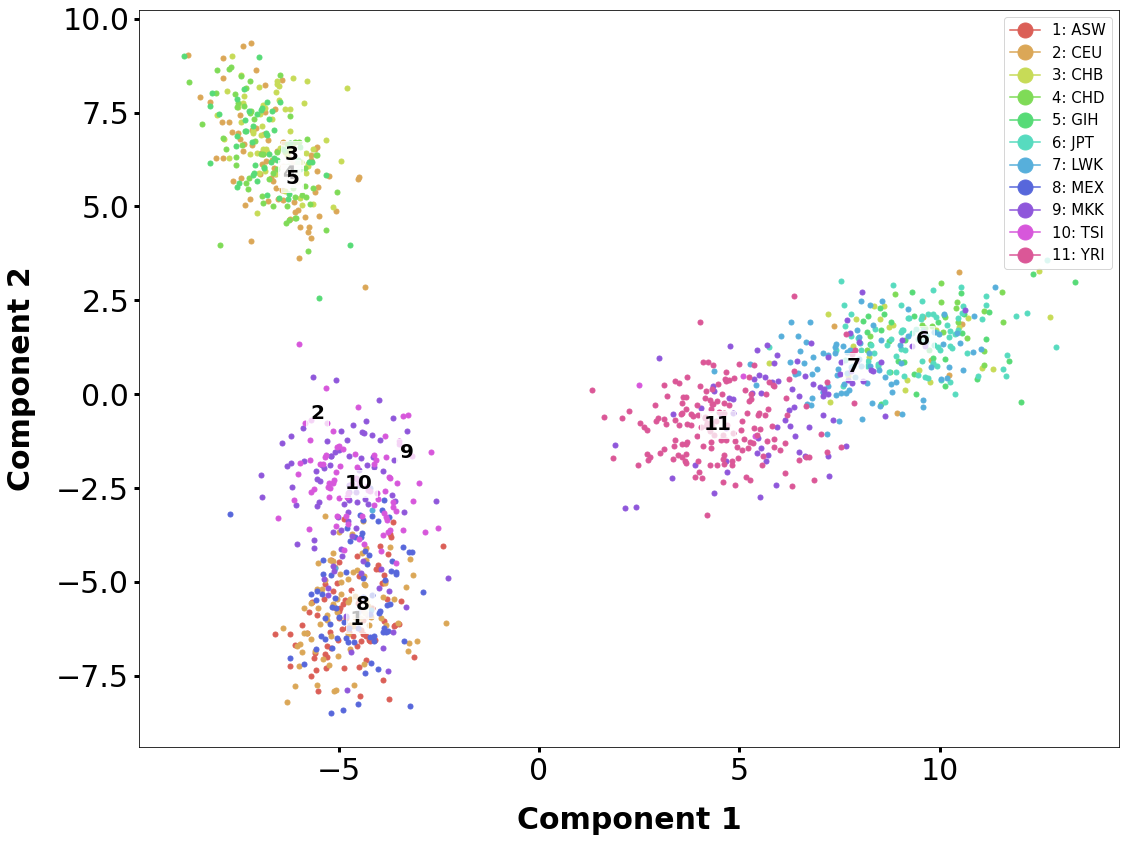

In [175]:
pcaplot= plot_scatter_cluster(data=df_pca, abscissa='component_1', ordinate='component_2', label_horizontal='Component 1', label_vertical='Component 2', factor='population', fonts=define_font_properties(), colors=define_color_properties(), legend=True)

#poner variacion de componentes.


In [176]:
#TSNE 
tsne = TSNE(n_components=3)
tsne_results = tsne.fit_transform(x)

df_tsne= pd.DataFrame(tsne_results,
                          columns=['component_1','component_2', 'component_3'],
                          index=features.index)



df_tsne = features.merge(df_tsne, left_index=True, right_index=True)
df_tsne

,sex,population,pheno,component_1,component_2,component_3
NA19625,2,ASW,0,113.964401,-10.830033,-7.434821
NA19702,1,ASW,0,88.964676,9.872651,-27.166458
NA19700,1,ASW,0,79.574326,-5.639478,-88.722054
NA19701,2,ASW,0,29.775490,-6.712059,-18.976501
NA19705,1,ASW,0,91.834618,0.455171,-29.546812
...,...,...,...,...,...,...
NA19236,1,YRI,0,-23.619192,-15.891899,-101.004143
NA19235,2,YRI,0,75.538437,-39.288712,57.693993
NA19249,1,YRI,0,-13.931417,-62.353298,-70.383835
NA19248,1,YRI,0,5.630263,93.802406,78.016624


            sex  pheno  component_1  component_2  component_3
population                                                   
ASW           2      0   113.964401   -10.830033    -7.434821
ASW           1      0    88.964676     9.872651   -27.166458
ASW           1      0    79.574326    -5.639478   -88.722054
ASW           2      0    29.775490    -6.712059   -18.976501
ASW           1      0    91.834618     0.455171   -29.546812
...         ...    ...          ...          ...          ...
YRI           1      0   -23.619192   -15.891899  -101.004143
YRI           2      0    75.538437   -39.288712    57.693993
YRI           1      0   -13.931417   -62.353298   -70.383835
YRI           1      0     5.630263    93.802406    78.016624
YRI           2      0    59.882408   -46.443909    34.879128

[1184 rows x 5 columns]
Count of groups by factor: 11


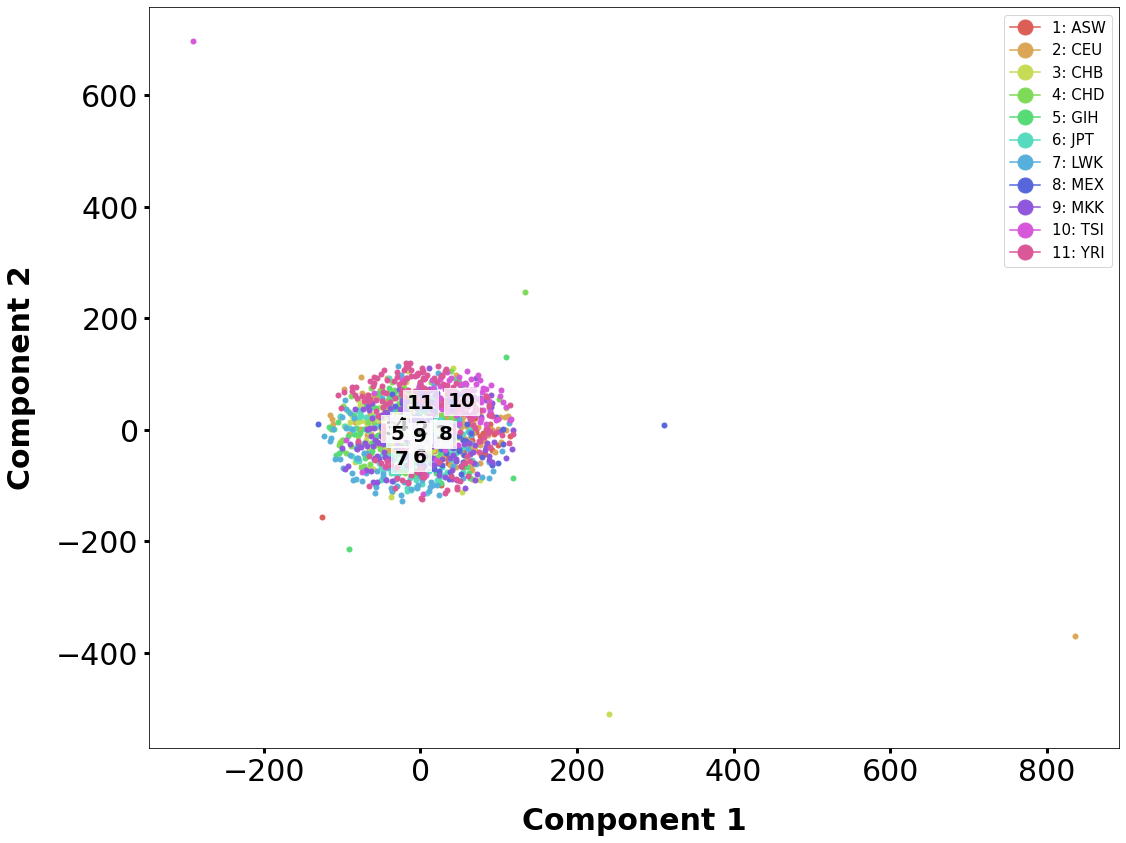

In [177]:
tsneplot= plot_scatter_cluster(data=df_tsne, abscissa='component_1', ordinate='component_2', label_horizontal='Component 1', label_vertical='Component 2', factor='population', fonts=define_font_properties(), colors=define_color_properties(), legend=True)




In [178]:
mds = MDS(3,random_state=0)
mds_results = mds.fit_transform(x)

            sex  pheno  component_1  component_2  component_3
population                                                   
ASW           2      0     6.731467   -10.680478   -18.676027
ASW           1      0    13.037847    14.101973    -6.737300
ASW           1      0   -20.535704    -2.209150   -15.668592
ASW           2      0     2.941095    15.522149    -4.984040
ASW           1      0     7.397940   -17.499990    -9.805434
...         ...    ...          ...          ...          ...
YRI           1      0   -15.927651    16.698027   -15.953578
YRI           2      0    13.834909   -28.743826     2.233382
YRI           1      0   -16.921656     4.142059   -18.355053
YRI           1      0   -27.512975     6.083361    12.252051
YRI           2      0   -22.863889   -15.438513   -19.047319

[1184 rows x 5 columns]
Count of groups by factor: 11


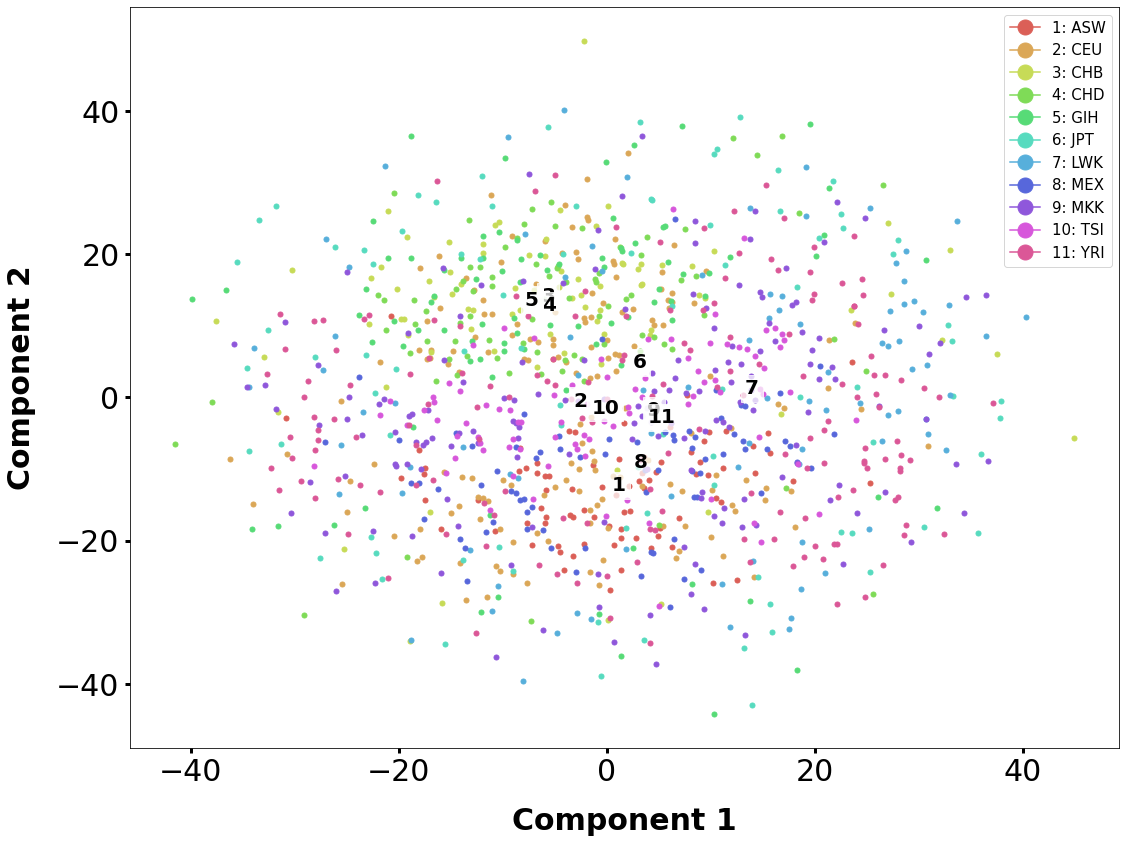

In [179]:
df_mds= pd.DataFrame(mds_results,
                          columns=['component_1','component_2', 'component_3'],
                          index=features.index)



df_mds = features.merge(df_mds, left_index=True, right_index=True)
df_mds

mdsplot= plot_scatter_cluster(data=df_mds, abscissa='component_2', ordinate='component_3', label_horizontal='Component 1', label_vertical='Component 2', factor='population', fonts=define_font_properties(), colors=define_color_properties(), legend=True)



In [ ]:
def plot_scatter_cluster(
data=None,
abscissa=None,
ordinate=None,
label_horizontal=None,
label_vertical=None,
factor=None,
fonts=None,
colors=None,
legend=None,
):
    """
    Creates a figure of a chart of type histogram to represent the frequency
    distribution of a single series of values.
    arguments:
        data (object): Pandas data frame of groups, series, and values
        abscissa (str): name of data column with independent variable
        ordinate (str): name of data column with dependent variable
        label_horizontal (str): label for horizontal axis
        label_vertical (str): label for vertical axis
        factor (str): name of data column with groups or factors of samples
        fonts (dict<object>): references to definitions of font properties
        colors (dict<tuple>): references to definitions of color properties
        legend (bool): whether to include a legend for series on the chart
    raises:
    returns:
        (object): figure object
    """
##########
# Organize data.
# Separate points by groups.
# Define groups.
    data = data.copy(deep=True)
    data.set_index(
        factor,
append=False,
drop=True,
inplace=True
    )
    print(data)
    groups = data.groupby(level=[factor])
    print("Count of groups by factor: " + str(len(groups)))
    colors_series = list(seaborn.color_palette("Set3", n_colors=len(groups)))
##########
# Create figure.
    figure = matplotlib.pyplot.figure(
    figsize=(15.748, 11.811),
    tight_layout=True
    )
# Create axes.
    axes = matplotlib.pyplot.axes()
    axes.set_xlabel(
    xlabel=label_horizontal,
labelpad=20,
alpha=1.0,
backgroundcolor=colors["white"],
color=colors["black"],
fontproperties=fonts["properties"]["one"]
    )
    axes.set_ylabel(
        ylabel=label_vertical,
        labelpad=20,
        alpha=1.0,
        backgroundcolor=colors["white"],
        color=colors["black"],
        fontproperties=fonts["properties"]["one"]
    )
    axes.tick_params(
        axis="both",
        which="both",
        direction="out",
        length=5.0,
        width=3.0,
        color=colors["black"],
        pad=5,
        labelsize=fonts["values"]["one"]["size"],
        labelcolor=colors["black"]
    )
# Plot points for values from each group.
    index = 0
    for name, group in groups:
        values_x = group[abscissa].to_list()
        values_y = group[ordinate].to_list()
        handle = axes.plot(
            values_x,
            values_y,
linestyle="",
marker="o",
markersize=2.5,
markeredgecolor=colors_series[index],
markerfacecolor=colors_series[index]
        )
        index += 1
        pass
# Plot labels for each group.
    labels = []
    index = 0
    for name, group in groups:
        values_x = group[abscissa].to_list()
        mean_x = statistics.median(values_x)
        values_y = group[ordinate].to_list()
        mean_y = statistics.median(values_y)
        axes.text(
            mean_x,
            mean_y,
str(index+1),
backgroundcolor=colors["white_faint"],
color=colors["black"],
fontproperties=fonts["properties"]["three"],
horizontalalignment="center",
verticalalignment="center"
        )
        label = str(index+1) + ": " + name
        labels.append(label)
        index += 1
        pass
# Create legend.
# Create custome elements for the legend
    elements = create_legend_elements(
colors=colors_series,
labels=labels
    )
    axes.legend(
handles=elements,
loc="lower right",
prop=fonts["properties"]["four"],
    )
    return figure



In [81]:
def define_font_properties():
    """
    Defines font properties.
    arguments:
    raises:
    returns:
        (dict<object>): references to definitions of font properties
    """
# Define font values.
    values_one = {
"family": "sans-serif",
"style": "normal",
"variant": "normal",
"stretch": 1000,
"weight": 1000,
"size": 30
    }
    values_two = {
"family": "sans-serif",
"style": "normal",
"variant": "normal",
"stretch": 500,
"weight": 1000,
"size": 25
    }
    values_three = {
"family": "sans-serif",
"style": "normal",
"variant": "normal",
"stretch": 500,
"weight": 1000,
"size": 20
    }
    values_four = {
"family": "sans-serif",
"style": "normal",
"variant": "normal",
"stretch": 500,
"weight": 500,
"size": 15
    }
# Define font properties.
    properties_one = matplotlib.font_manager.FontProperties(
family=values_one["family"],
style=values_one["style"],
variant=values_one["variant"],
stretch=values_one["stretch"],
weight=values_one["weight"],
size=values_one["size"]
    )
    properties_two = matplotlib.font_manager.FontProperties(
family=values_two["family"],
style=values_two["style"],
variant=values_two["variant"],
stretch=values_two["stretch"],
weight=values_two["weight"],
size=values_two["size"]
    )
    properties_three = matplotlib.font_manager.FontProperties(
family=values_three["family"],
style=values_three["style"],
variant=values_three["variant"],
stretch=values_three["stretch"],
weight=values_three["weight"],
size=values_three["size"]
    )
    properties_four = matplotlib.font_manager.FontProperties(
family=values_four["family"],
style=values_four["style"],
variant=values_four["variant"],
stretch=values_four["stretch"],
weight=values_four["weight"],
size=values_four["size"]
    )
# Compile and return references.
    return {
"values": {
"one": values_one,
"two": values_two,
"three": values_three,
"four": values_four
        },
"properties": {
"one": properties_one,
"two": properties_two,
"three": properties_three,
"four": properties_four
        }
    }

In [82]:
def define_color_properties():
    """
    Defines color properties.
    arguments:
    raises:
    returns:
        (dict<tuple>): references to definitions of color properties
    """
# Black.
    black = (0.0, 0.0, 0.0, 1.0)
# White.
    white = (1.0, 1.0, 1.0, 1.0)
    white_faint = (1.0, 1.0, 1.0, 0.75)
# Blue.
    blue = (0.0, 0.2, 0.5, 1.0)
    blue_faint = (0.0, 0.2, 0.5, 0.75)
# Orange.
    orange = (1.0, 0.6, 0.2, 1.0)
    orange_faint = (1.0, 0.6, 0.2, 0.75)
# Compile and return references.
    return {
"black": black,
"white": white,
"white_faint": white_faint,
"blue": blue,
"blue_faint": blue_faint,
"orange": orange,
"orange_faint": orange_faint
    }

In [83]:
def create_legend_elements(
colors=None,
labels=None,
):
    """
    Creates custom elements for legend.
    arguments:
        colors (list<dict>): colors
        labels (str): name of data column with independent variable
    raises:
    returns:
        (list<object>): elements for legend
    """
    elements = []
    for index in range(len(labels)):
        element = matplotlib.lines.Line2D(
            [0],
            [0],
            marker="o",
            color=colors[index],
            label=labels[index],
            markerfacecolor=colors[index],
            markersize=15,
        )
        elements.append(element)
    return elements